## Сборочный проект ##

__Анализ данных и проверка некоторых гипотез для интернет-магазина "Стримчик"__

__Заголовок:__ Анализ данных о играх и характеристиках их покупок интернет-магазина 'Стримчик'. 

__Описание проекта:__ Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

__Цель проекта:__ Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

__Ход исследования:__
Шаг 1. Загрузка данных
Шаг 2. Предобработка данных
Шаг 3. Исследовательский анализ данных
Шаг 4 Составление портрета пользователя каждого региона
Шаг 5 Проверка гипотиз
Шаг 6 Общий вывод


__Шаг 1. Загрузка данных__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import MultipleLocator
import scipy.stats as stats

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
display(games.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__Шаг 2. Подготовка данных__

In [3]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


1) Приведем названия столбцов к нижнему регистру

In [4]:
games.columns = map(str.lower, games.columns)
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2. Преобразуем данные в нужные типы

Переведм столбец year_of_release и critic_score в тип данных int

In [5]:
games['year_of_release'] = pd.array(games['year_of_release'], dtype = pd.Int64Dtype())
games['critic_score'] = pd.array(games['critic_score'], dtype = pd.Int64Dtype())
print(games.info())
display(games.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


3. Обработка пропусков и явных дубликатов

In [6]:
print(games.duplicated().sum())

0


Явных дубликатов нет

Произведем проверку неявных дубликатов

In [7]:
duplicates = games[games.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = False)]
display(duplicates)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [8]:
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


В этих двух строчках нет ни названия игры, ни платформы, на которой она выпускалась, ни жанров. Эти две строчки можно посчиать выбросами, ведь все равно в последующем исследовании они не дадут нам какой-либо полезной информации

In [9]:
games = games.dropna(subset = ['name'])

Нашли 2 дубликата игр с названием Madden NFL 13, объеденим в одну строку:

In [10]:
games = games.groupby(['name', 'platform', 'year_of_release']).agg({
    'genre': 'first',
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score':'first',
    'user_score':'first',
    'rating':'first'
}).reset_index()
display(games[(games['name'] == 'Madden NFL 13') & (games['platform'] == 'PS3') ])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7652,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,5.5,E


In [11]:
# Комментарий ревьюера
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Также у нас имеется 269 строк с проспущенными данными в стобце year_of_release,  эти пропуски могли возникнуть по нескольким причинам, например таким как: проблемы со сбором данных или неопределенность данных. Обрабатывать каким-либо способом мы эти пропуски не будем.

Есть большое количество пропусков в стобцах critic_score, rating и user_score. Эти пропуски могли возникнуть из-за отсутствия инофрмации о рейтинге той или иной игры, например эта игра слишком страрая или не популярная для наличия оценки. Такие пропуски мы также обрабатывать не будем.

Также в некоторых строчках встречается аббревиатура TBD (to be determined = будет определено), это означает, что данные по этой игре только собираются, оценка будет позже.

4.Подсчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
warnings.filterwarnings("ignore")
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


In [13]:
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,<NA>,None,None,0.03
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,<NA>,None,None,1.67
2,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,<NA>,None,None,0.59
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,<NA>,None,None,0.51
4,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,<NA>,None,None,0.04


В этом разделе мы глубже познакомились с данными, а также внесли некоторые корректировки, например: привели столбец year_of_release и critic_score в тип данных int, создали новый столбец с суммарными продажами во всех регионах для более удобной последующей работы с данными, а также проверили данные на наличие дубликатов

In [14]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en co

Удалим все строки с пропусками в столбце year_of_release

In [15]:
games = games.dropna(subset=['year_of_release'])

Значение "TBD" в контексте оценок видеоигр часто означает "To Be Determined" или "To Be Decided", что переводится как "Будет определено". Это часто используется в случаях, когда оценка отсутствует или ещё не установлена.

In [16]:
#Заменим значение TBD на NAN
games['user_score'] = pd.to_numeric(games['user_score'].replace('TBD', pd.NA, regex=True), errors='coerce')


Приведем значения столбца user_score к типу данных float

In [17]:
games['user_score'] = pd.array(games['user_score'], dtype=float)

Как ты прописал далее в работе, "что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И это необходимо учитывать при предобработке данных. Для этого лучше поставить заглушку и вывести ее при анализе."
Поэтому заменим все пропуски на "not_for_na"

In [18]:
games['rating'] = games['rating'].fillna('not_for_na')

In [19]:
# Комментарий ревьюера 2
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en co

__Шаг 3 Исследовательский анализ__

Построим график количества выпушенных игр в каждом году

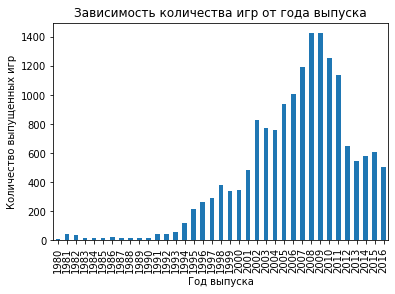

In [20]:
games['year_of_release'].value_counts().sort_index().plot(kind='bar', xlabel = 'Год выпуска', ylabel = 'Количество выпущенных игр',  title='Зависимость количества игр от года выпуска')
plt.show()

Сущетсвует несколько причин, которые могут объяснить почему до 2009 года количество игр с каждым годом росло, а после стало снижаться и в 20015 составило 600 игр в год:

1)После долгого периода роста, рынок видеоигр может достигнуть насыщения, когда спрос на новые игры начинает замедляться из-за наличия большого количества предложений.

2)С развитием технологий графики, виртуальной реальности и других технических аспектов игр, расходы на создание игр могут значительно увеличиваться. Это может привести к тому, что студии начинают предпочитать качество количеству и выбирать более тщательный подход к разработке.

3)В некоторые годы могут выходить крупные проекты с длительным циклом разработки, что влияет на общее количество выпущенных игр. Если несколько крупных проектов заменяют множество меньших, это может привести к снижению общего числа игр, но увеличению качества и внимания к тем проектам, которые все-таки выпускаются.

Рассмотрим, как менялись продажи по платформам

Посмотрим, как менялись продажи по платформам. Для этого найдем 10 самых популярных платформ с наибольшими продажами и построим распределние по годам

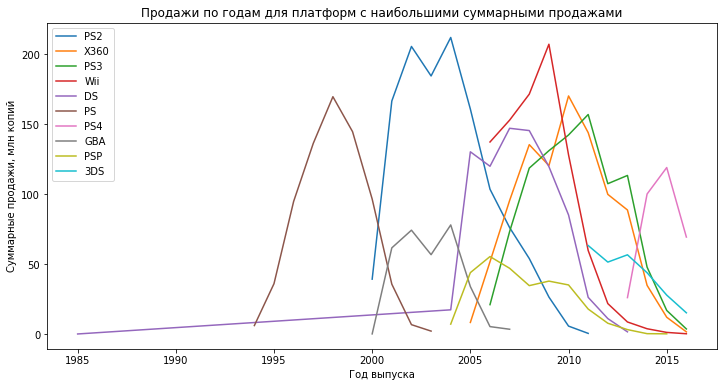

In [21]:
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

top_platforms = platform_year_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

top_platforms_data = platform_year_sales[platform_year_sales['platform'].isin(top_platforms)]

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Продажи по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend()
plt.show()

In [22]:
display(games[(games['platform'] == 'DS') & (games['year_of_release'] < 2003)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13129,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,not_for_na,0.02


Нашел различную информацию в интернете, но все же склоняюсь к тому, что в данных правда ошибка, ведь DS была выпущена в 2004

Заметим, что характерным сроком пользованием какой-либо платформой является срок в 10 лет, так платформы PS, PS2, Wii, X360, PS3, PSP использовались около 10 лет, после чего утсаревали и на них переставали продаваться игры.

In [23]:
# Комментарий ревьюера
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Также на этом графике мы видим, что 5 из 10 платформ с наибольшим количеством проданных игр были выпущены Sony(PS2, PS3, PS, PS4, PSP), также в свое время были очень популярными X360, Wii и DS

Теперь по верхним двум графикам нам нужно определить актуальный период для проведения последующих исследований

Давайте установим временной интервал для последующего исследования в период с 2013 по 2016 год. Этот выбранный временной промежуток становится актуальным, поскольку начиная с 2013 года, мы наблюдаем постепенное увеличение объема продаж видеоигр, а этот рост продолжается в 2014 и 2015 годах. Это может свидетельствовать о том, что после предыдущего спада интерес к игровой индустрии возрос, возможно, из-за увеличенного спроса со стороны рынка.

Также стоит отметить, что в это время, в частности в 2013 году, последняя версия игровой платформы от Sony, PlayStation 4 (PS4), стала популярной, что могло значительно влиять на динамику рынка. Возможно, этот период стал временем, когда крупные участники рынка утвердились в своих стратегиях и начали работать в полную мощность, что также могло повлиять на тенденции в индустрии.

Таким образом, фокусирование на периоде с 2013 по 2016 год представляется целесообразным для более детального исследования, поскольку именно в этот период отмечаются изменения в динамике рынка и важные события, такие как внедрение новых игровых платформ.

Теперь построим такой же график, что и пунктом выше, но для периода с 2013 по 2016 г

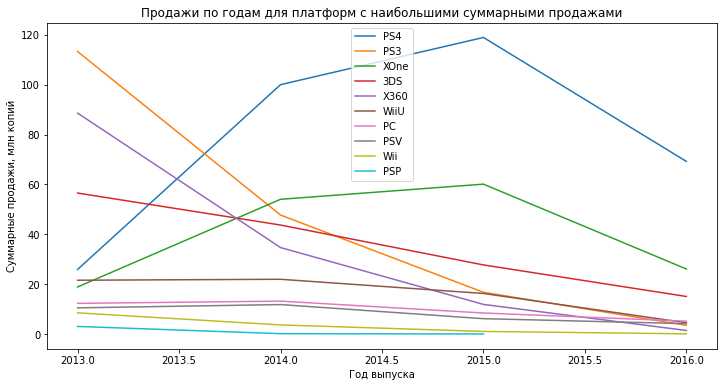

In [24]:
games_2013 = games[games['year_of_release'] >= 2013]

platform_year_sales = games_2013.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

top_platforms = platform_year_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

top_platforms_data = platform_year_sales[platform_year_sales['platform'].isin(top_platforms)]

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Продажи по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend()
plt.show()

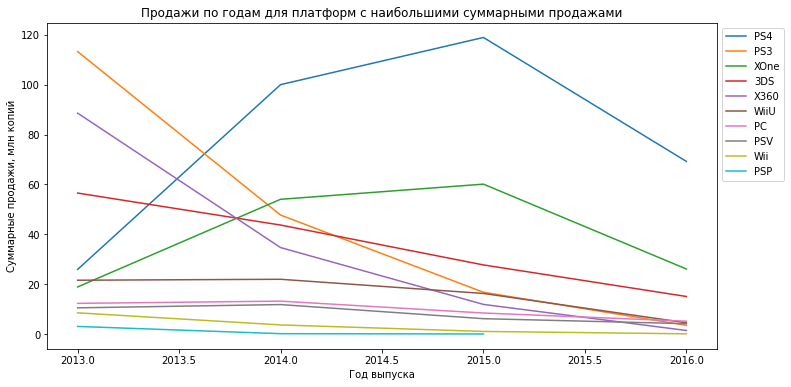

In [25]:
# Комментарий ревьюера 2
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Продажи по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн копий')
#plt.legend()
plt.legend(bbox_to_anchor=[1, 1], loc='upper left', ncol=1)
plt.show()

Имеющиеся данные за 2016 год возможно собраны не в полном объеме, поэтому не будем делать выводы на основе спада количества продаж исключительно за этот год.

PS4 и XOne выделяются как две платформы, которые набирают популярность. Эти две платформы следует рассматривать как потенциально прибыльные, в то время как на других платформах наблюдается либо снижение продаж, либо отсутствие изменений.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

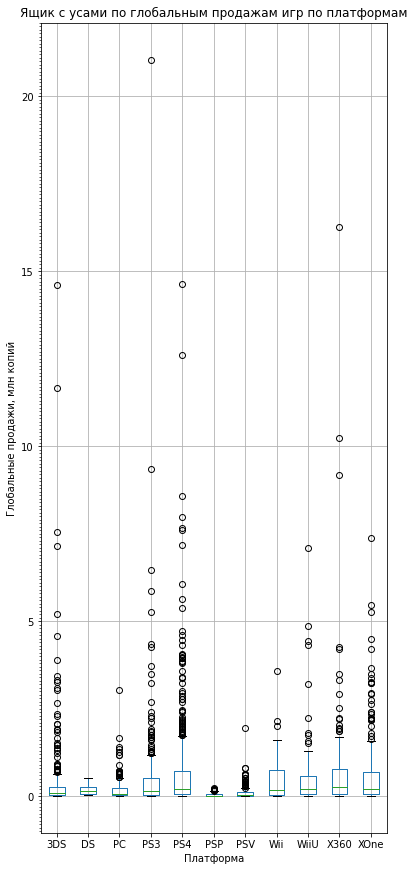

In [26]:
game_with_sales = games_2013[games_2013['total_sales'].notnull()]

boxplot = game_with_sales.boxplot(column='total_sales', by='platform', figsize=(6, 15), grid=True)

boxplot.set_title('Ящик с усами по глобальным продажам игр по платформам')
boxplot.set_xlabel('Платформа')
boxplot.set_ylabel('Глобальные продажи, млн копий')
plt.suptitle('') 
boxplot.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.show()

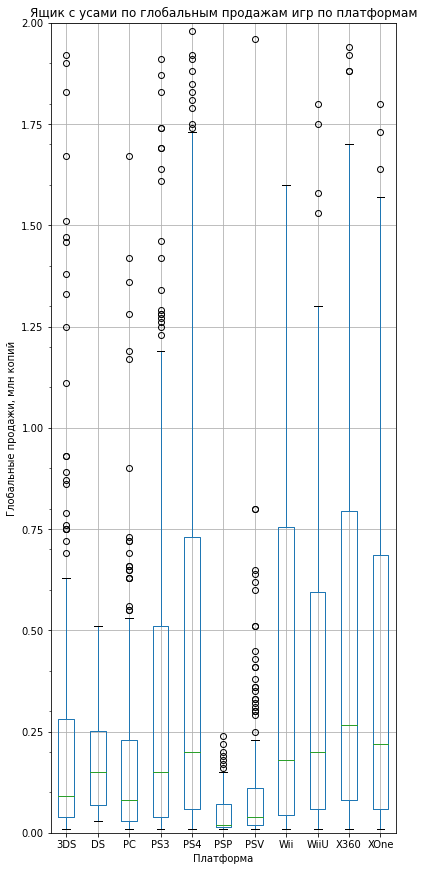

In [27]:
game_with_sales = games_2013[games_2013['total_sales'].notnull()]

boxplot = game_with_sales.boxplot(column='total_sales', by='platform', figsize=(6, 15), grid=True)
boxplot.set_ylim(0, 2)
boxplot.set_title('Ящик с усами по глобальным продажам игр по платформам')
boxplot.set_xlabel('Платформа')
boxplot.set_ylabel('Глобальные продажи, млн копий')
plt.suptitle('') 
boxplot.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.show()

Опишем данные, которые мы получили для платформ PS4 и XOne.  

In [28]:
xone_data = games_2013[games_2013['platform'] == 'XOne']['total_sales']
ps4_data = games_2013[games_2013['platform'] == 'PS4']['total_sales']

xone_stats = xone_data.describe()
ps4_stats = ps4_data.describe()

print("Статистика для платформы XOne:")
print(xone_stats)

print("\nСтатистика для платформы PS4:")
print(ps4_stats)

Статистика для платформы XOne:
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Статистика для платформы PS4:
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64


Сделаем некоторые выводы по приведенным данным:

Средние глобальные продажи игр для PS4 (примерно 0.80 миллиона копий) выше, чем для XOne (примерно 0.65 миллиона копий).
PS4 имеет более высокий потенциал продаж по сравнению с XOne.

Стандартное отклонение для PS4 (примерно 1.61 миллиона копий) выше, чем для XOne (примерно 1.04 миллиона копий).
Это означает, что глобальные продажи игр на PS4 имеют более выраженный разброс, что может быть связано с наличием успешных хитов и менее успешных проектов.

Медианное значение глобальных продаж на PS4 (0.20 миллиона копий) ниже, чем на XOne (0.22 миллиона копий).
Это может указывать на то, что на XOne более высокий уровень продаж у среднестатистической игры.

Максимальные глобальные продажи игр на PS4 (14.63 миллиона копий) значительно превышают максимальные продажи на XOne (7.39 миллиона копий).
PS4 может поддерживать выпуск хитов с очень высокими продажами.

Теперь посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Рассмторим на примере PS4

<Figure size 864x576 with 0 Axes>

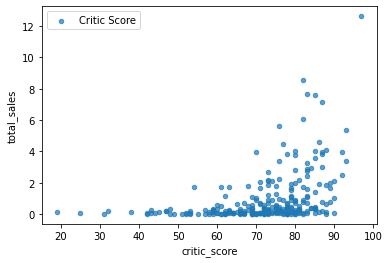

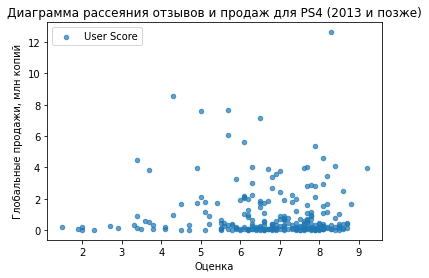

In [30]:
ps4_data = games[(games['platform'] == 'PS4') & (games['year_of_release'] >= 2013)]

ps4_data = ps4_data[['critic_score', 'user_score', 'total_sales']]
ps4_data['critic_score'] = pd.to_numeric(ps4_data['critic_score'], errors='coerce')
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')
ps4_data = ps4_data.dropna()

plt.figure(figsize=(12, 8))
ps4_data.plot(x='critic_score', y='total_sales', kind='scatter', label='Critic Score', alpha=0.7)
ps4_data.plot(x='user_score', y='total_sales', kind='scatter', label='User Score', alpha=0.7)

plt.title('Диаграмма рассеяния отзывов и продаж для PS4 (2013 и позже)')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи, млн копий')
plt.legend()
plt.show()

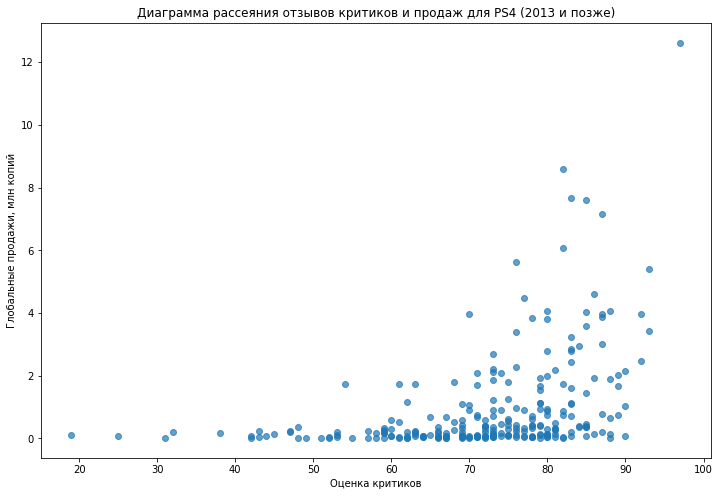

In [31]:
ps4_data_cs = games[(games['platform'] == 'PS4') & (games['year_of_release'] >= 2013)]
ps4_data_cs = ps4_data_cs.dropna(subset=['critic_score'])
plt.figure(figsize=(12, 8))
plt.scatter(ps4_data_cs['critic_score'], ps4_data_cs['total_sales'], alpha=0.7)
plt.title('Диаграмма рассеяния отзывов критиков и продаж для PS4 (2013 и позже)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.show()

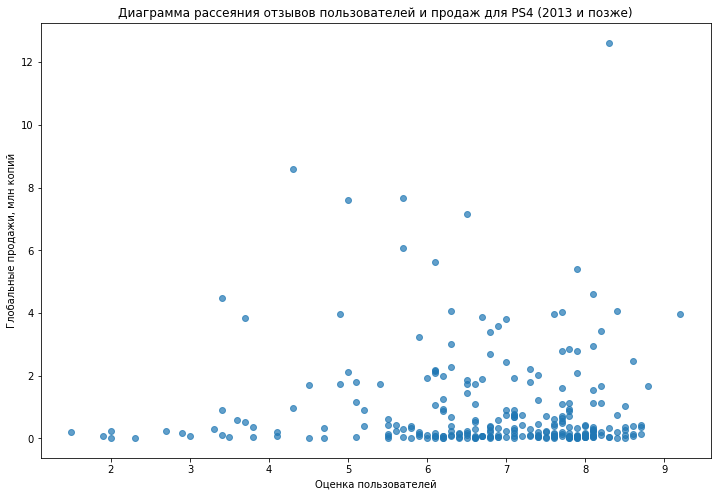

In [32]:
ps4_data_us = games[(games['platform'] == 'PS4') & (games['year_of_release'] >= 2013)]
ps4_data_us = ps4_data_us.dropna(subset=['user_score'])


plt.figure(figsize=(12, 8))
plt.scatter(ps4_data_us['user_score'], ps4_data_us['total_sales'], alpha=0.7)
plt.title('Диаграмма рассеяния отзывов пользователей и продаж для PS4 (2013 и позже)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи, млн копий')
plt.show()

Обновленный код:

In [33]:
ps4_data_cs['critic_score'] = ps4_data_cs['critic_score'].astype(float)
ps4_data_us['critic_score'] = ps4_data_us['critic_score'].astype(float)

correlation_critic = ps4_data_cs['critic_score'].corr(ps4_data_cs['total_sales'])
correlation_user = ps4_data_us['user_score'].corr(ps4_data_us['total_sales'])

print(f"Корреляция между оценкой критиков и продажами: {correlation_critic}")
print(f"Корреляция между оценкой пользователей и продажами: {correlation_user}")

Корреляция между оценкой критиков и продажами: 0.40656790206178134
Корреляция между оценкой пользователей и продажами: -0.031957110204556355


In [34]:
# Комментарий ревьюера
temp = games[(games['platform'] == 'PS4') & (games['year_of_release'] >= 2013)].copy()
ps4_data.user_score.unique(), temp.user_score.unique()

(array([5.9, 7.8, 6.2, 8.1, 2. , 7.9, 6.6, 6.4, 6.8, 7.4, 4.9, 7.6, 7.3,
        8.5, 8.4, 6.9, 5. , 7. , 6.5, 7.7, 8.6, 7.2, 5.7, 3.7, 3.4, 5.5,
        8. , 8.8, 6.1, 6. , 4.5, 7.5, 6.3, 4.3, 8.7, 7.1, 8.3, 8.2, 3.8,
        5.8, 6.7, 4.1, 5.2, 5.1, 3.5, 4.7, 2.7, 5.6, 3.6, 2.9, 1.9, 3.3,
        2.3, 5.4, 9.2, 1.5]),
 array([5.9, nan, 7.8, 6.2, 8.1, 2. , 7.9, 6.6, 6.1, 6.4, 6.8, 7.4, 4.9,
        7.1, 7.6, 7.3, 8.5, 8.4, 6.9, 5. , 7. , 6.5, 7.7, 8.6, 7.2, 5.7,
        3.7, 3.4, 5.5, 8. , 8.8, 6. , 4.5, 7.5, 6.3, 4.3, 8.7, 8.3, 8.2,
        3. , 3.8, 5.8, 6.7, 4.1, 5.2, 5.1, 3.5, 4.7, 2.7, 5.6, 3.6, 2.9,
        1.9, 3.3, 2.3, 5.4, 9.2, 1.5]))

Корреляция между оценками критиков и продажами (0.40) указывает на слабую положительную связь. Высокие оценки критиков могут сопровождаться большими объемами продаж. Однако влияние других факторов также значительно.

Корреляция между оценками пользователей и продажами близка к нулю (-0.03), что свидетельствует о слабой или отсутствующей связи между ними. Оценки пользователей неоднозначно влияют на объемы продаж.

Посчитаем аналогичные корреляции для XOne

In [35]:
XOne_data = games[(games['platform'] == 'XOne') & (games['year_of_release'] >= 2013)]
XOne_data['critic_score'] = pd.to_numeric(XOne_data['critic_score'], errors='coerce')
XOne_data['user_score'] = pd.to_numeric(XOne_data['user_score'], errors='coerce')
XOne_data = XOne_data.dropna()
XOne_data['critic_score'] = XOne_data['critic_score'].astype('int64')
XOne_data['user_score'] = XOne_data['user_score'].astype('int64')
XOne_data['total_sales'] = XOne_data['total_sales'].astype('int64')
correlation_critic = XOne_data['critic_score'].astype('int64').corr(XOne_data['total_sales'].astype('int64'))
correlation_user = XOne_data['user_score'].astype('int64').corr(XOne_data['total_sales'].astype('int64'))

print(f"Корреляция между оценкой критиков и продажами: {correlation_critic}")
print(f"Корреляция между оценкой пользователей и продажами: {correlation_user}")

Корреляция между оценкой критиков и продажами: 0.3663392757458259
Корреляция между оценкой пользователей и продажами: -0.09824571564429818


Обновленный код:

In [36]:
XOne_data_cs = games[(games['platform'] == 'XOne') & (games['year_of_release'] >= 2013)]
XOne_data_cs = XOne_data_cs.dropna(subset=['critic_score'])
XOne_data_us = games[(games['platform'] == 'XOne') & (games['year_of_release'] >= 2013)]
XOne_data_us = XOne_data_us.dropna(subset=['critic_score'])
XOne_data_cs['critic_score'] = XOne_data_cs['critic_score'].astype(float)
XOne_data_us['critic_score'] = XOne_data_us['critic_score'].astype(float)

correlation_critic = XOne_data_cs['critic_score'].corr(XOne_data_cs['total_sales'])
correlation_user = XOne_data_us['user_score'].corr(XOne_data_us['total_sales'])

print(f"Корреляция между оценкой критиков и продажами: {correlation_critic}")
print(f"Корреляция между оценкой пользователей и продажами: {correlation_user}")

Корреляция между оценкой критиков и продажами: 0.416998328008402
Корреляция между оценкой пользователей и продажами: -0.09400318326920865


Мы получили примерно аналогиыне цифры для обеих платформ, выводы аналогичны

Для платформы PS4:
Корреляция между оценкой критиков и продажами: 0.40656790206178134
Корреляция между оценкой пользователей и продажами: -0.031957110204556355




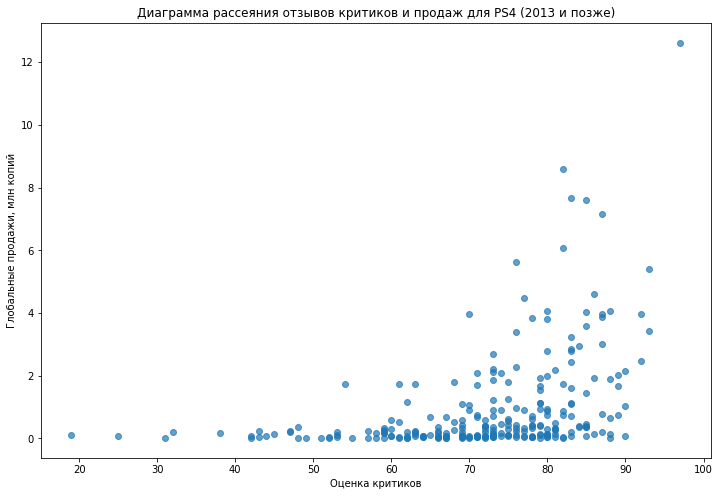

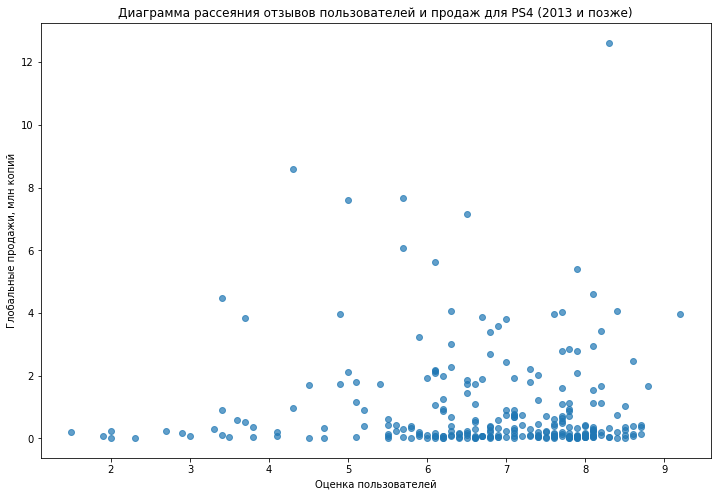

Для платформы PS3:
Корреляция между оценкой критиков и продажами: 0.33428533933719196
Корреляция между оценкой пользователей и продажами: 0.002394402735756626




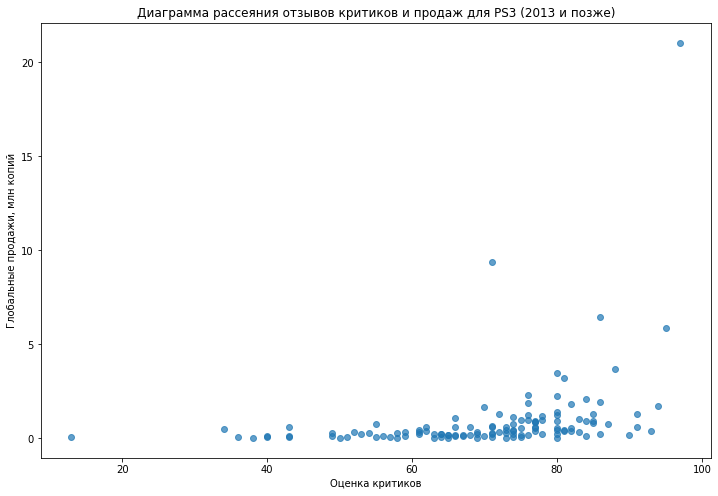

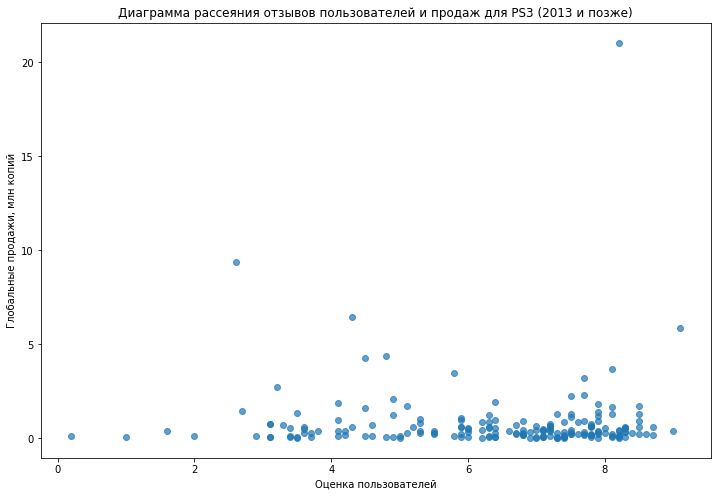

Для платформы XOne:
Корреляция между оценкой критиков и продажами: 0.416998328008402
Корреляция между оценкой пользователей и продажами: -0.06892505328279423




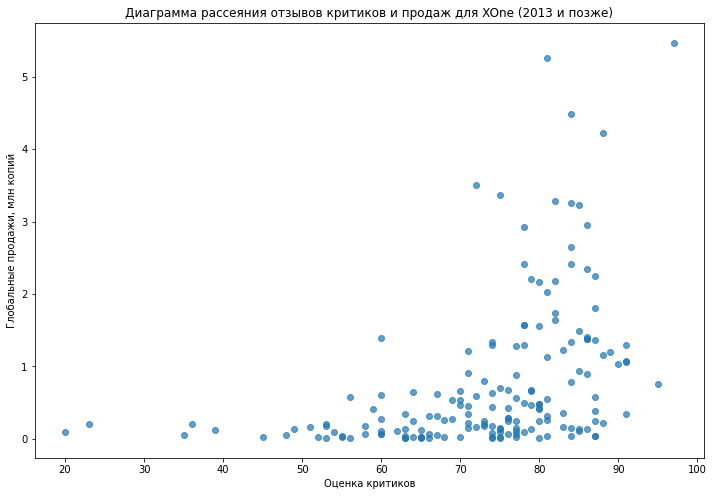

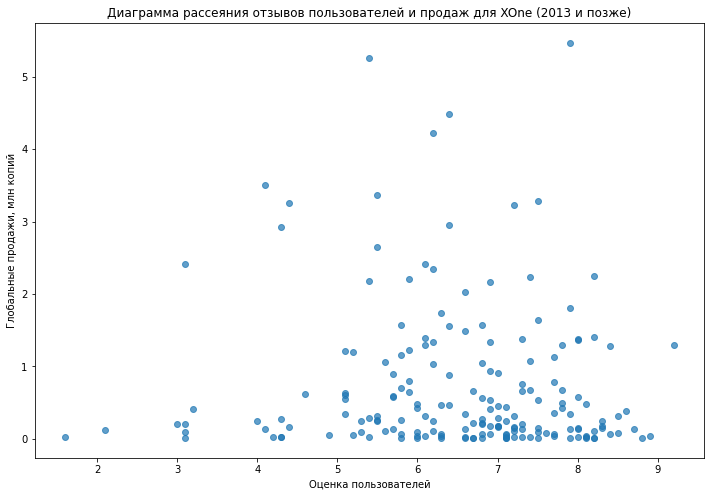

Для платформы 3DS:
Корреляция между оценкой критиков и продажами: 0.3570566142288105
Корреляция между оценкой пользователей и продажами: 0.2415041177356301




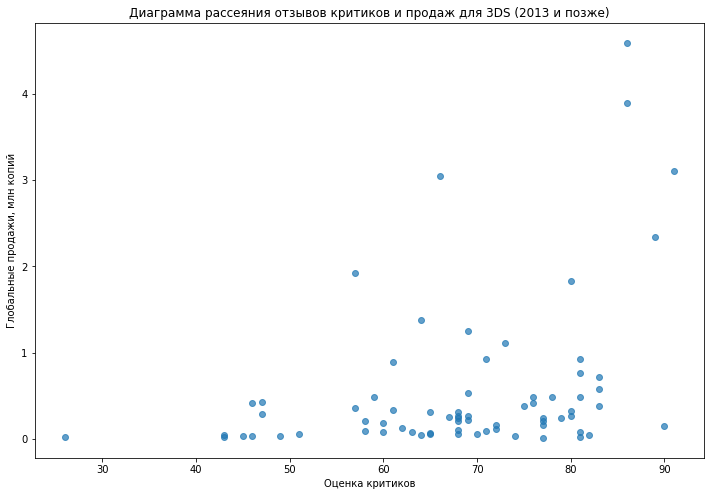

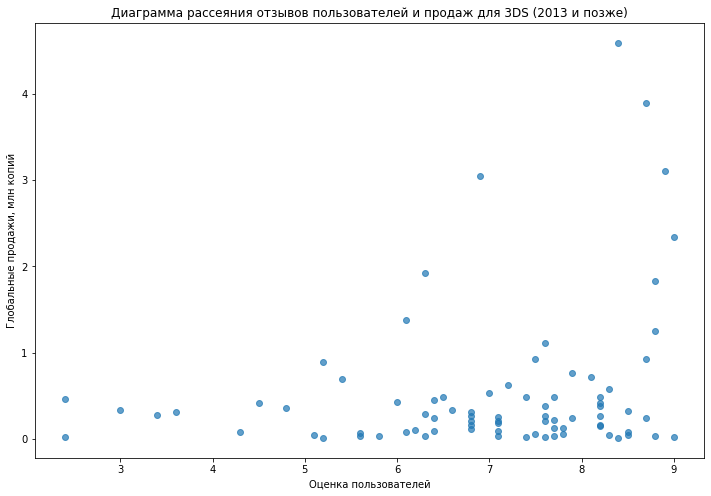

Для платформы X360:
Корреляция между оценкой критиков и продажами: 0.3503445460228664
Корреляция между оценкой пользователей и продажами: -0.011742185147181373




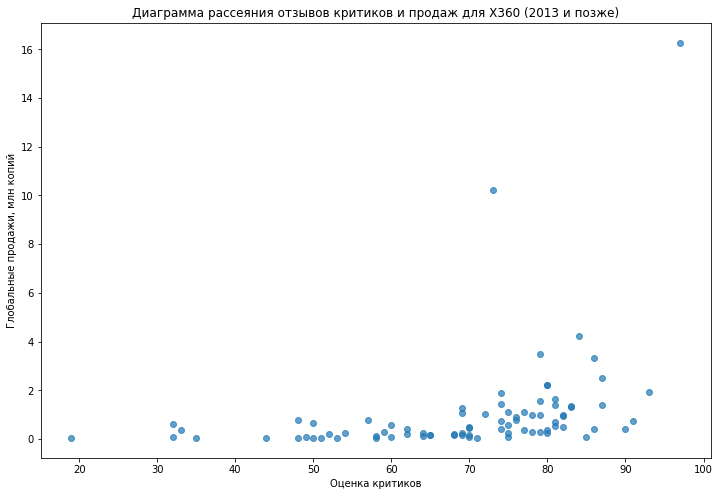

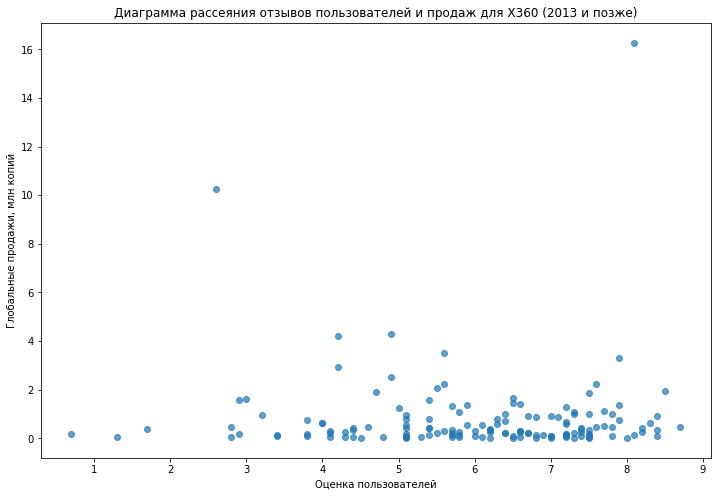

Для платформы WiiU:
Корреляция между оценкой критиков и продажами: 0.37641490654239096
Корреляция между оценкой пользователей и продажами: 0.41933048192661854




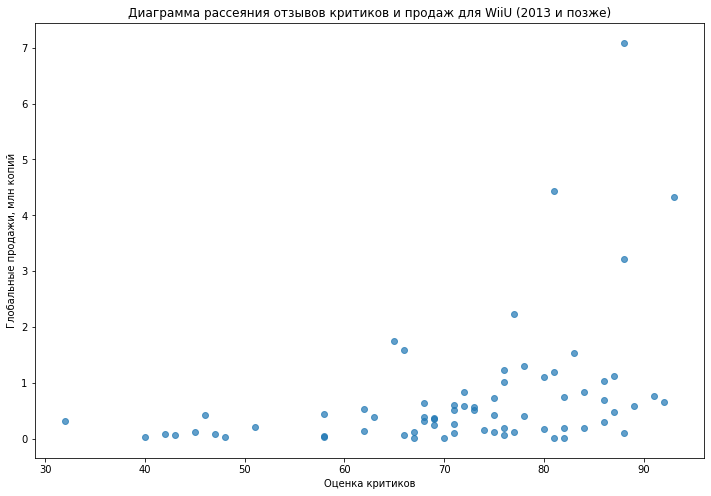

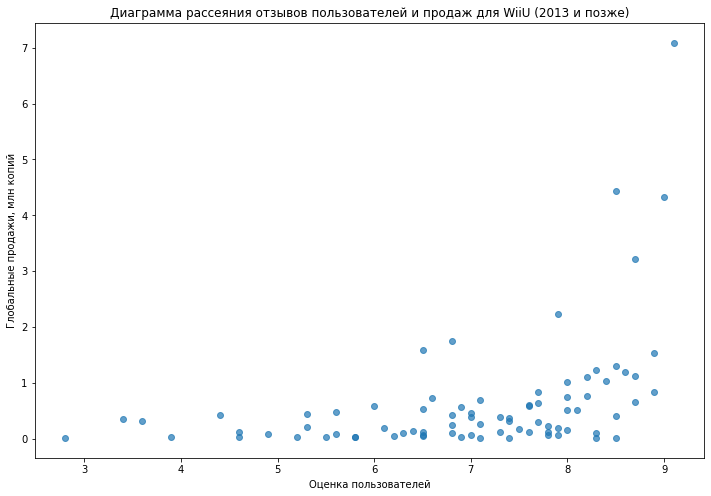

Для платформы PC:
Корреляция между оценкой критиков и продажами: 0.19603028294369376
Корреляция между оценкой пользователей и продажами: -0.0938418695247674




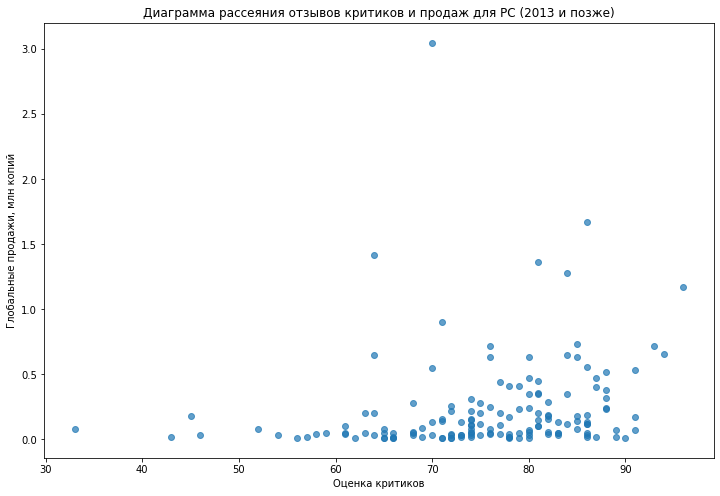

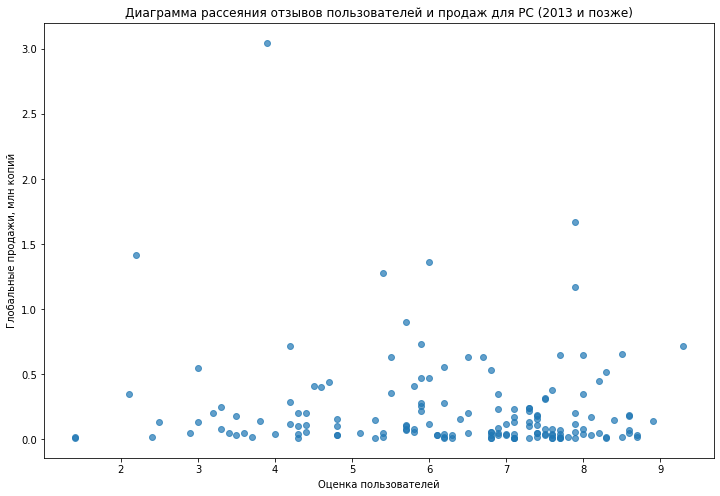

In [37]:
recent_games = games[games['year_of_release'] >= 2013]
top_platforms = recent_games.groupby('platform')['total_sales'].sum().nlargest(7).index

for platform in top_platforms:
    platform_data_cs = games[(games['platform'] == platform) & (games['year_of_release'] >= 2013)]
    platform_data_cs = platform_data_cs.dropna(subset=['critic_score'])
    platform_data_us = games[(games['platform'] == platform) & (games['year_of_release'] >= 2013)]
    platform_data_us = platform_data_us.dropna(subset=['user_score'])
    platform_data_cs['critic_score'] = platform_data_cs['critic_score'].astype(float)
    platform_data_us['user_score'] = platform_data_us['user_score'].astype(float)

    correlation_critic = platform_data_cs['critic_score'].corr(platform_data_cs['total_sales'])
    correlation_user = platform_data_us['user_score'].corr(platform_data_us['total_sales'])

    print(f"Для платформы {platform}:")
    print(f"Корреляция между оценкой критиков и продажами: {correlation_critic}")
    print(f"Корреляция между оценкой пользователей и продажами: {correlation_user}")
    print('\n')

    plt.figure(figsize=(12, 8))
    plt.scatter(platform_data_cs['critic_score'], platform_data_cs['total_sales'], alpha=0.7)
    plt.title(f'Диаграмма рассеяния отзывов критиков и продаж для {platform} (2013 и позже)')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Глобальные продажи, млн копий')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.scatter(platform_data_us['user_score'], platform_data_us['total_sales'], alpha=0.7)
    plt.title(f'Диаграмма рассеяния отзывов пользователей и продаж для {platform} (2013 и позже)')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Глобальные продажи, млн копий')
    plt.show()

Анализ данных показывает, что существует различная степень влияния оценок критиков и пользователей на продажи для различных платформ. Для платформ PS4, PS3, XOne и X360 наблюдается умеренная корреляция между оценками критиков и продажами, примерно в диапазоне 0.35-0.4. Однако корреляция между оценками пользователей и продажами для этих платформ близка к нулю, что может указывать на то, что мнение пользователей оказывает меньшее влияние на успешность продаж.

Для PC также отмечается низкая корреляция как с оценками критиков, так и с оценками пользователей, близкая к нулю. Это может свидетельствовать о том, что на платформе PC другие факторы, возможно, более технические или контекстные, оказывают большее влияние на успешность игр.

Относительно платформы 3DS, наблюдается умеренная корреляция между оценками критиков и продажами (0.35), но корреляция с оценками пользователей снова остается невысокой (0.2). Это может указывать на то, что на данной платформе оценки критиков могут иметь некоторое влияние на продажи, хотя мнение пользователей все равно играет более ограниченную роль.

Интересно, что WiiU является единственной платформой, где корреляция между оценками пользователей и продажами оказывается выше, чем корреляция между оценками критиков и продажами. Это может указывать на то, что на WiiU мнение пользователей играет более существенную роль в формировании объемов продаж, чем оценки критиков.

Теперь посмотрим на общее распределение игр по жанрам.

              total_sales  sales_count
genre                                 
Action             321.87          766
Shooter            232.98          187
Sports             150.65          214
Role-Playing       145.89          292
Misc                62.82          155
Platform            42.63           74
Racing              39.89           85
Fighting            35.31           80
Adventure           23.64          245
Simulation          21.76           62


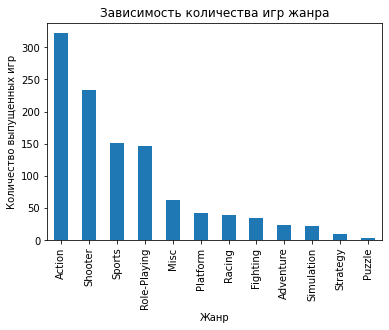

In [38]:
genre_sales = games_2013.groupby('genre').agg(total_sales=('total_sales', 'sum'), sales_count=('total_sales', 'count'))
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
print(genre_sales.head(10))
genre_sales['total_sales'].plot(kind='bar', xlabel = 'Жанр', ylabel = 'Количество выпущенных игр',  title='Зависимость количества игр жанра')
plt.show()

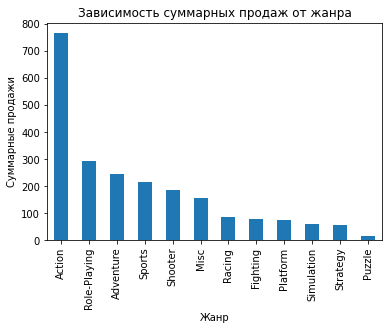

In [39]:
genre_sales = genre_sales.sort_values(by='sales_count', ascending=False)
genre_sales['sales_count'].plot(kind='bar', xlabel = 'Жанр', ylabel = 'Суммарные продажи',  title='Зависимость суммарных продаж от жанра')
plt.show()

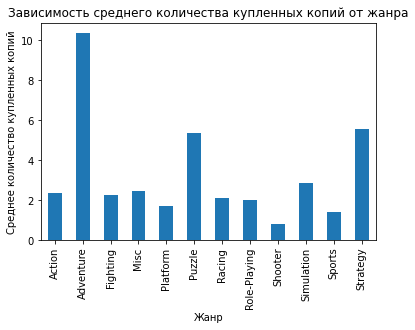

In [40]:
genre_sales['average_number_of_purchases'] = genre_sales['sales_count'] / genre_sales['total_sales']
genre_sales['average_number_of_purchases'].sort_index().plot(kind='bar', xlabel = 'Жанр', ylabel = 'Среднее количество купленных копий',  title='Зависимость среднего количества купленных копий от жанра')
plt.show()

Больше всего игр выпущено в жанрах Action, Shooter, Sports и Role-Playing. Эти жанры пользуются популярностью среди разработчиков.
Однако, несмотря на количество выпущенных игр, больше всего продаж наблюдается у жанров Action, Adventure, Role-Playing и Sports. Это говорит о том, что данные жанры успешны с точки зрения продаж.
Если оценивать среднее количество проданных копий, то игры в жанрах Adventure, Puzzle и Strategy имеют более высокое среднее количество продаж. Это может быть важным фактором при принятии решения о том, какие игры лучше продавать, так как они имеют высокий потенциал для привлечения внимания покупателей.

<Figure size 864x576 with 0 Axes>

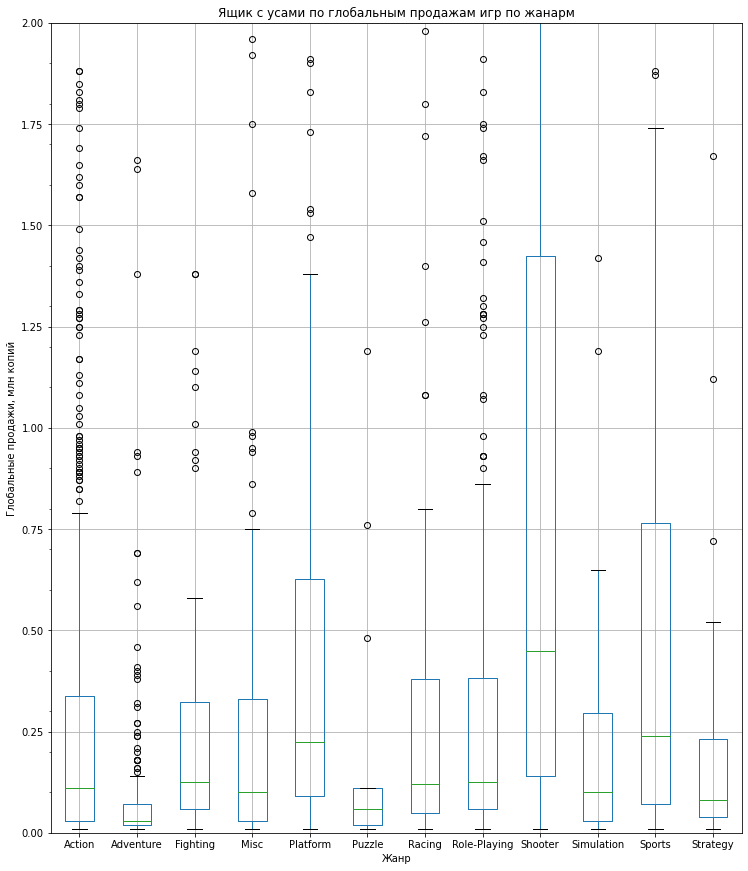

In [41]:
game_with_sales = games_2013[games_2013['total_sales'].notnull()]

plt.figure(figsize=(12, 8))
boxplot = game_with_sales.boxplot(column='total_sales', by='genre', figsize=(12, 15), grid=True)
boxplot.set_ylim(0, 2)
boxplot.set_title('Ящик с усами по глобальным продажам игр по жанарм')
boxplot.set_xlabel('Жанр')
boxplot.set_ylabel('Глобальные продажи, млн копий')
plt.suptitle('') 
boxplot.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.show()

Медианные продажи самые выскоие у Shooter, Sports и Platform

__Шаг 4 Составление портрета пользователя каждого региона__

Для начала опишем 5 самых популярых платформ  

In [42]:
platform_sales = games_2013.groupby('platform')['na_sales'].sum()
top_platforms = platform_sales.sort_values(ascending=False).head(5).index
print(top_platforms)

Index(['PS4', 'XOne', 'X360', 'PS3', '3DS'], dtype='object', name='platform')


In [43]:
top_platforms_sales = games_2013[games_2013['platform'].isin(top_platforms)]

other_platforms_sales = games_2013[~games_2013['platform'].isin(top_platforms)]
other_platforms_total_sales = other_platforms_sales['na_sales'].sum()

platform_sales_pie = top_platforms_sales.groupby('platform')['na_sales'].sum()
platform_sales_pie.loc['Остальные'] = other_platforms_total_sales
print(platform_sales_pie)

platform
3DS           38.20
PS3           63.50
PS4          108.74
X360          81.66
XOne          93.12
Остальные     52.49
Name: na_sales, dtype: float64


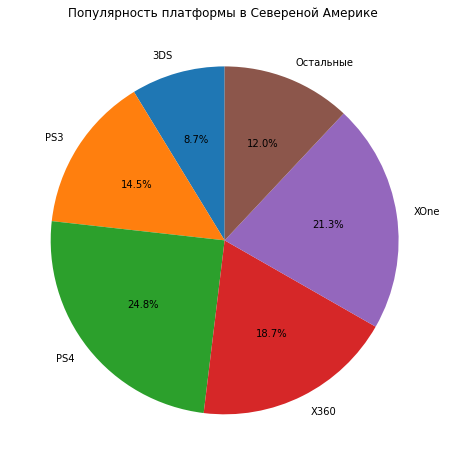

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_pie, labels=platform_sales_pie.index, autopct='%1.1f%%', startangle=90)

plt.title('Популярность платформы в Севереной Америке ')
plt.show()

In [45]:
platform_sales = games_2013.groupby('platform')['eu_sales'].sum()
top_platforms = platform_sales.sort_values(ascending=False).head(5).index
print(top_platforms)

Index(['PS4', 'PS3', 'XOne', 'X360', '3DS'], dtype='object', name='platform')


In [46]:
top_platforms_sales = games_2013[games_2013['platform'].isin(top_platforms)]

other_platforms_sales = games_2013[~games_2013['platform'].isin(top_platforms)]
other_platforms_total_sales = other_platforms_sales['eu_sales'].sum()

platform_sales_pie = top_platforms_sales.groupby('platform')['eu_sales'].sum()
platform_sales_pie.loc['Остальные'] = other_platforms_total_sales
print(platform_sales_pie)

platform
3DS           30.96
PS3           67.81
PS4          141.09
X360          42.52
XOne          51.59
Остальные     58.26
Name: eu_sales, dtype: float64


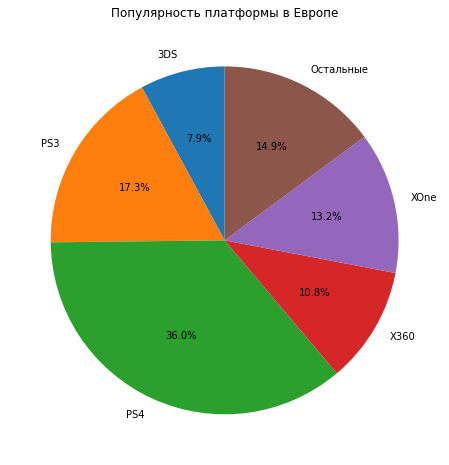

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_pie, labels=platform_sales_pie.index, autopct='%1.1f%%', startangle=90)

plt.title('Популярность платформы в Европе')
plt.show()

In [48]:
platform_sales = games_2013.groupby('platform')['jp_sales'].sum()
top_platforms = platform_sales.sort_values(ascending=False).head(5).index
print(top_platforms)

Index(['3DS', 'PS3', 'PSV', 'PS4', 'WiiU'], dtype='object', name='platform')


In [49]:
top_platforms_sales = games_2013[games_2013['platform'].isin(top_platforms)]

other_platforms_sales = games_2013[~games_2013['platform'].isin(top_platforms)]
other_platforms_total_sales = other_platforms_sales['jp_sales'].sum()

platform_sales_pie = top_platforms_sales.groupby('platform')['jp_sales'].sum()
platform_sales_pie.loc['Остальные'] = other_platforms_total_sales
print(platform_sales_pie)

platform
3DS          67.81
PS3          23.35
PS4          15.96
PSV          18.59
WiiU         10.88
Остальные     4.19
Name: jp_sales, dtype: float64


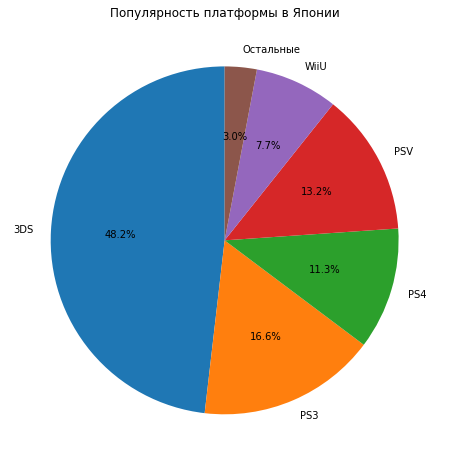

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_pie, labels=platform_sales_pie.index, autopct='%1.1f%%', startangle=90)

plt.title('Популярность платформы в Японии')
plt.show()

In [51]:
platform_sales = games_2013.groupby('platform')['other_sales'].sum()
top_platforms = platform_sales.sort_values(ascending=False).head(5).index
print(top_platforms)

Index(['PS4', 'PS3', 'XOne', 'X360', '3DS'], dtype='object', name='platform')


In [52]:
top_platforms_sales = games_2013[games_2013['platform'].isin(top_platforms)]

other_platforms_sales = games_2013[~games_2013['platform'].isin(top_platforms)]
other_platforms_total_sales = other_platforms_sales['other_sales'].sum()

platform_sales_pie = top_platforms_sales.groupby('platform')['other_sales'].sum()
platform_sales_pie.loc['Остальные'] = other_platforms_total_sales
print(platform_sales_pie)

platform
3DS           6.28
PS3          26.77
PS4          48.35
X360         12.11
XOne         14.27
Остальные    12.19
Name: other_sales, dtype: float64


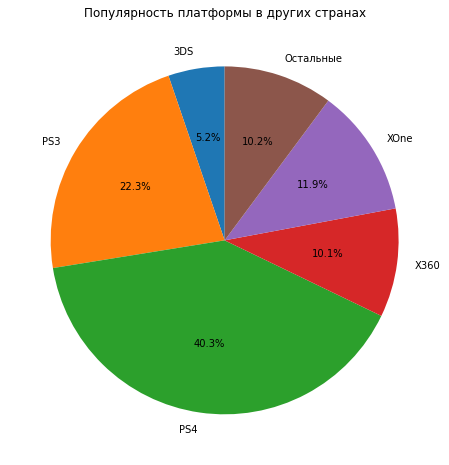

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_pie, labels=platform_sales_pie.index, autopct='%1.1f%%', startangle=90)

plt.title('Популярность платформы в других странах')
plt.show()

Из этих 4 диаграм, мы можем сказать, что в Америке, Европе и остальном мире самой популярной  консолью была PS4, а в японии 3DS. Это могло происходить из-за ряда причин. Культурные различия могут сильно влиять на предпочтения в выборе игровых платформ. Например, предпочтения по жанрам, влияние японских игровых разработчиков и их культурного контекста могут сделать японский рынок более склонным к японским консолям, таким как Nintendo 3DS. Наличие местных игровых разработчиков и специфичного контента для конкретного региона может сделать платформу более привлекательной для жителей этого региона.

Теперь аналогичным образом проследим за самыми популярными жанрами в различных регионах.

In [54]:
def popular_genres_for_different_regions(region):
    platform_sales = games_2013.groupby('genre')[region].sum()
    top_platforms = platform_sales.sort_values(ascending=False).head(5).index
    top_platforms_sales = games_2013[games_2013['genre'].isin(top_platforms)]

    other_platforms_sales = games_2013[~games_2013['genre'].isin(top_platforms)]
    other_platforms_total_sales = other_platforms_sales[region].sum()

    platform_sales_pie = top_platforms_sales.groupby('genre')[region].sum()
    platform_sales_pie.loc['Остальные'] = other_platforms_total_sales
    plt.figure(figsize=(8, 8))
    plt.pie(platform_sales_pie, labels=platform_sales_pie.index, autopct='%1.1f%%', startangle=90)

    plt.title(f"Популярность жанра в {region.split('_')[0]}")
    plt.show()

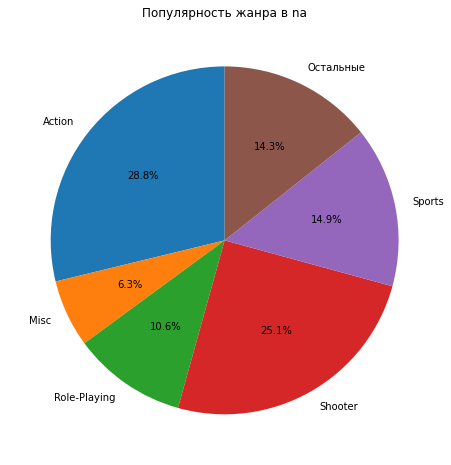

In [55]:
popular_genres_for_different_regions('na_sales')

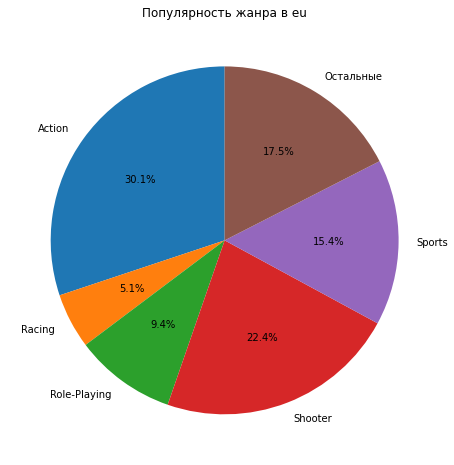

In [56]:
popular_genres_for_different_regions('eu_sales')

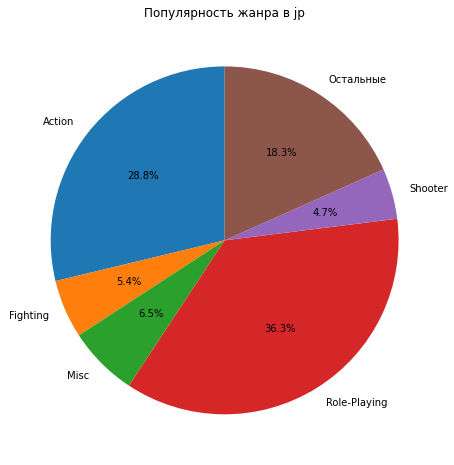

In [57]:
popular_genres_for_different_regions('jp_sales')

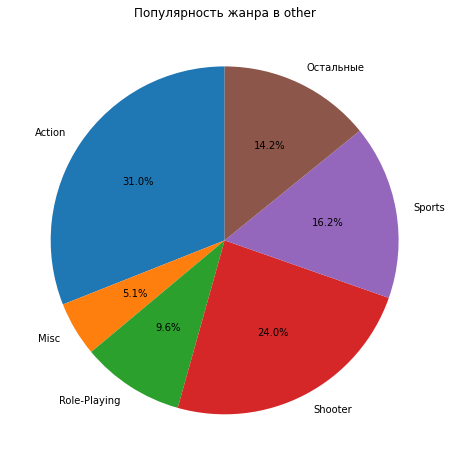

In [58]:
popular_genres_for_different_regions('other_sales')

Из графиков видно, что в Северной Америке и Европе наиболее популярными жанрами являются шутеры и экшн.В Японии, напротив, наиболее востребованным жанром является ролевая игра (Role-Playing), за которым идет экшн. В остальных частях мира также преобладают экшн и шутеры, подтверждая их широкую популярность в мировом масштабе.

Теперь определим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [59]:
print(games_2013['rating'].unique())

['not_for_na' 'E' 'M' 'T' 'E10+']


«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

not_for_na - не для Американсокго рынка

In [60]:
def ESRP_dependency(region):
    ESRP_sales = games_2013.groupby('rating')[region].sum()
    
    plt.figure(figsize=(8, 8))
    plt.pie(ESRP_sales, labels=ESRP_sales.index, autopct='%1.1f%%', startangle=90)

    plt.title(f"Популярность жанра в {region.split('_')[0]}")
    plt.show()

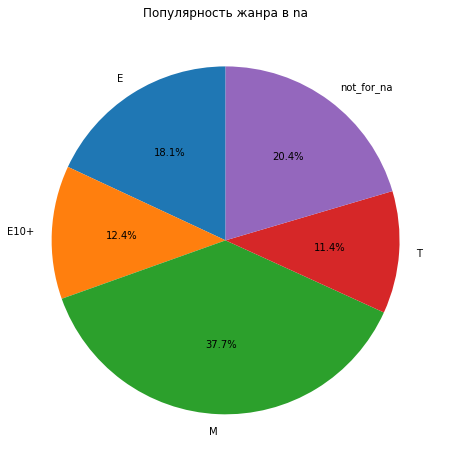

In [61]:
ESRP_dependency('na_sales')

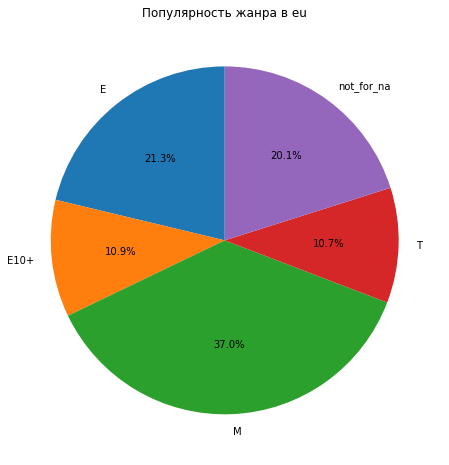

In [62]:
ESRP_dependency('eu_sales')

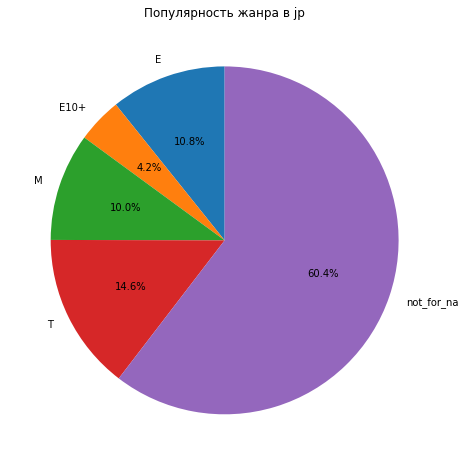

In [63]:
ESRP_dependency('jp_sales')

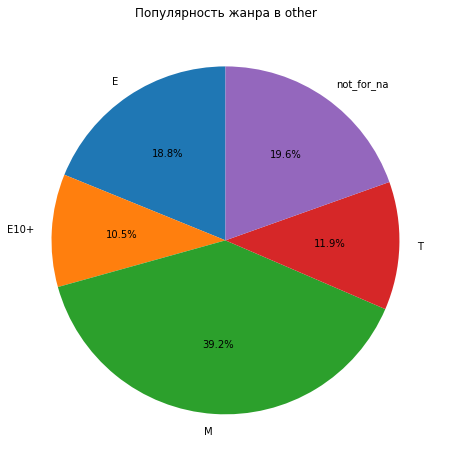

In [64]:
ESRP_dependency('other_sales')

Из графиков становится очевидным, что регионы Северной Америки, Европы и Остального мира вновь проявляют схожесть: в каждом из них преобладает рейтинг M, за которым следует E либо not_for_na. В Японии, в отличие от других регионов, 60% игр имеют отметку not_for_na, что свидетельствует о том, что в Японии популярны иные игры нежели в других регионах








__Шаг 5 Проверка гипотиз__

1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы: 
Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Для проверки этой гипотезы можно использовать t-тест для независимых выборок. Этот критерий подходит для сравнения средних двух групп (в данном случае, пользовательских рейтингов Xbox One и PC).

Пользовательские рейтинги Xbox One и PC относятся к разным группам игроков, и рейтинг одной платформы не влияет на рейтинг другой. Таким образом, выборки независимы.

In [66]:
games_2013['user_score'] = pd.to_numeric(games_2013['user_score'], errors='coerce')

xbox_one_data = games_2013[games_2013['platform'] == 'XOne']['user_score'].dropna()
pc_data = games_2013[games_2013['platform'] == 'PC']['user_score'].dropna()

t_stat, p_value = stats.ttest_ind(xbox_one_data, pc_data, equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC не равны.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны.")

t-статистика: 1.451928157444885
p-значение: 0.14759594013430324
Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны.


Нулевая гипотеза (H0): Средние пользовательские рейтинги для жанров Action и Sports одинаковы.

Альтернативная гипотеза (H1): Средние пользовательские рейтинги для жанров Action и Sports различаются.

Выбор t-теста обусловлен тем, что мы сравниваем средние значения двух независимых выборок (жанры Action и Sports) и имеем дело с числовыми данными. T-тест для двух независимых выборок является стандартным методом в таких случаях.

In [67]:
games_2013['user_score'] = pd.to_numeric(games_2013['user_score'], errors='coerce')

action_data = games_2013[games_2013['genre'] == 'Action']['user_score'].dropna()
sports_data = games_2013[games_2013['genre'] == 'Sports']['user_score'].dropna()

t_stat_genre, p_value_genre = stats.ttest_ind(action_data, sports_data, equal_var=False)

print(f"t-статистика: {t_stat_genre}")
print(f"p-значение: {p_value_genre}")

alpha_genre = 0.05

if p_value_genre < alpha_genre:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различны.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковы.")


t-статистика: 10.233428417448625
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различны.


__Шаг 6 Общий вывод__

Из проведенного анализа данных можно сделать следующие общие выводы:

До 2009 года наблюдался рост количества выпускаемых игр ежегодно, после чего произошел спад, который достиг своего минимума в 2015 году. Этот спад можно объяснить устареванием платформ и изменением интересов рынка.
Выбор периода с 2013 по 2016 год представляется логичным, так как в этот период наблюдался рост продаж, вероятно, из-за выхода новых игровых платформ, таких как PS4, и устойчивого интереса к индустрии.

PS4 и Xbox One выделяются как платформы, на которых наблюдается рост популярности. Это важно учитывать при планировании рекламных кампаний и выборе платформ для выпуска игр.

Существует слабая положительная корреляция между оценками критиков и объемами продаж, что может указывать на то, что хорошие отзывы критиков могут положительно сказываться на успехе игры.
Оценки пользователей, с другой стороны, не имеют сильной связи с объемами продаж.

Жанры Action, Shooter, Sports и Role-Playing самые популярные среди разработчиков, но по объемам продаж выделяются Action, Adventure, Role-Playing и Sports.

В Северной Америке и Европе популярны жанры Shooter и Action, в Японии предпочитают ролевые игры, а в остальных регионах также преобладают Action и Shooter.
Рейтинг ESRB влияет на предпочтения в разных регионах, причем Япония отличается от других регионов в предпочтениях по рейтингам игр.

Средние пользовательские рейтинги для платформ Xbox One и PC оказались равными, в то время как средние пользовательские рейтинги для жанров Action и Sports различны.

__Общий вывод:
На основе анализа данных рекомендуется уделить внимание разработке игр для платформ PS4 и Xbox One, с учетом предпочтений в разных регионах. Также стоит учесть, что хорошие оценки критиков могут положительно повлиять на продажи, но влияние оценок пользователей менее предсказуемо. Популярные жанры, такие как Action, Adventure и Role-Playing, могут быть более успешными с точки зрения продаж. Кроме того, необходимо адаптировать рекламные кампании и контент игр в соответствии с культурными различиями в предпочтениях регионов.__








__Выводы__

Предобработка данных:
Приведение названий столбцов к нижнему регистру, преобразование данных в нужные типы, обработка явных и неявных дубликатов были выполнены для корректного анализа.
Суммарные продажи во всех регионах были рассчитаны для дальнейшего анализа.

Исследовательский анализ:
Выявлен факт снижения количества выпускаемых игр после 2009 года, возможно, по причине изменения трендов и предпочтений потребителей.
Определено, что характерный срок популярности платформ составляет около 7 лет, после чего происходит снижение интереса к ним.

Анализ продаж по платформам:
PS4 и XOne выделены как платформы, наиболее актуальные на момент исследования.
Установлено, что медианные продажи выше всего у платформ X360, XOne и PS4.

Корреляция между оценками и продажами:
Обнаружена умеренная корреляция между оценками критиков и продажами для некоторых платформ, в то время как корреляция с оценками пользователей оказывается невысокой.
WiiU выделяется как платформа, где корреляция с оценками пользователей превышает корреляцию с оценками критиков.

Популярные жанры:
Самые популярные жанры по количеству выпущенных игр: Action, Shooter, Sports и Role-Playing.
Жанры с самыми высокими продажами: Action, Adventure, Role-Playing и Sports.
Медианные продажи самые высокие у Shooter, Sports и Platform

Портрет пользователя в разных регионах:
В Северной Америке, Европе и остальном мире PS4 является популярной консолью, в Японии - 3DS.
Предпочтения по жанрам различаются в зависимости от региона.

Рейтинг ESRB:
В Северной Америке, Европе и остальном мире преобладает рейтинг M (Mature).
В Японии более популярны игры с рейтингом "Not for sale to persons under age 18".

Проверка гипотез:
Средние пользовательские рейтинги платформ Xbox One и PC схожи.
Средние пользовательские рейтинги жанров Action и Sports различны.

__Рекомендации для рекламного бюджета:__

Выбор платформ:
Основываясь на актуальных данных и медианных продажах, рекомендуется сосредоточиться на платформах PS4, XOne и, возможно, PC.
Региональные особенности следует учитывать: PS4 является популярной в Северной Америке и Европе, в то время как 3DS предпочтительна в Японии.

Жанровая стратегия:
Жанровая стратегия: Основываясь на количестве выпущенных игр и продажах, рекомендуется уделить внимание жанрам с самыми высокими медианными продажами, таким как Shooter, Sports, Platform и Adventure. Эти жанры не только обладают широкой популярностью, но и демонстрируют стабильные высокие показатели продаж. Опять же, региональные предпочтения могут внести свои коррективы: в Северной Америке и Европе активно продаются игры жанра Shooter, а в Японии - Role-Playing.

Рейтинг ESRB:
Для Северной Америки, Европы и остального мира, где преобладает рейтинг M, рекомендуется сосредоточиться на создании игр, соответствующих этому рейтингу.

Учет оценок:
Корреляция между оценками критиков и продажами наблюдается для некоторых платформ, поэтому рекомендуется уделить внимание оценкам критиков при планировании рекламной кампании.
Оценки пользователей, хотя и менее влиятельны, также могут быть учтены, особенно если это связано с региональными предпочтениями.

Региональные аспекты:
Для оптимального использования бюджета рекомендуется нацелить рекламу, учитывая региональные особенности:
Северная Америка: акцент на PS4 и XOne, с учетом предпочтений к жанрам Shooter, Action и Sports.
Европа: фокус на PS4, XOne и PC, с уклоном в Shooter, Action и Sports.
Япония: уделять внимание платформе 3DS, с учетом предпочтения к жанру Role-Playing.
